In [66]:
from plio.io.io_moon_minerology_mapper import M3
from libpyhat.derived.m3 import pipe
from libpyhat.derived.m3 import new
import libpyhat as phat
from libpyhat.examples import get_path

%pylab inline

# Further documentation on LibPyHat can be found at: 
# https://usgs-astrogeology.github.io/PyHAT/

Populating the interactive namespace from numpy and matplotlib


# How to open an Image

In [67]:
# First, get the path of the file that contains the image you want to view.
# In this example, the program will search for and use the file "M3_4030seg_L2_aristcrater.tif"
# using the "get_path" function.
filepath = get_path('M3_4030seg_L2_aristcrater.tif')

# Next, use the M3 constructor found in the plio module to open the image
# by feeding it the filepath.
image = M3(filepath)

# In this case, the variable "image" can now be used as a reference to the given M3 image.

# How to Display a Single Band (By Index)

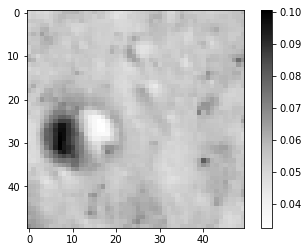

In [68]:
# First,open the desired .tif image and store it in a variable, as shown in the previous cell.

# The "get_path" function can be used inside of the M3 object constructor to achieve the same effect.
tif_image = M3(get_path('M3_4030seg_L2_aristcrater.tif'))

# Next, run the function to display the band.
# The image[n] parameter is used to select the index (n) 
# The cmap parameter is used to select the color mapping.

# Some color mapping options include:'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#                                    'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#                                    'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'

imshow(tif_image[0], cmap='Greys')

# Finally, display the associated color key (colorbar) alongside the band.
colorbar()

# How to Display a Single Band (By Label)

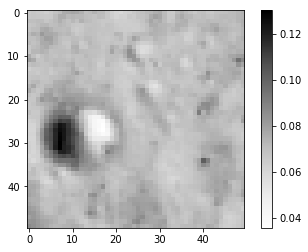

In [69]:
# First,open the desired .tif image and store it in a variable.
tif_image = M3(get_path('M3_4030seg_L2_aristcrater.tif'))

# Next, run the function to display the band.
# The image.loc[label] parameter is used to select the label. 
# The cmap parameter is used to select the color mapping.

# Color mapping options include:'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#                               'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#                               'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'

imshow(tif_image.loc[700], cmap='Greys')
colorbar()


# How to Generate an Olivine Derived Image

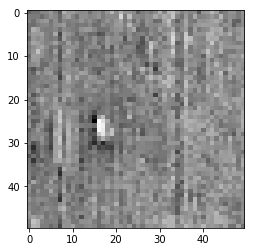

In [70]:
# First,open the desired .tif image and store it in a variable.
tif_image = M3(get_path('M3_4030seg_L2_aristcrater.tif'))

olivine_index_result = pipe.olindex(tif_image)


imshow(olivine_index_result, cmap='Greys')

# How to Display a Multi-Band Derived Image

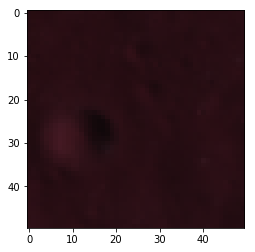

In [71]:
# First,open the desired .tif image and store it in a variable.
tif_image = M3(get_path('M3_4030seg_L2_aristcrater.tif'))

# Here you can specify which bands you would like to use.
bands = [1978, 540, 770]

# You can also specify a range and domain to acquire a subset of the image. 
# The syntax to do this would be: [bands, ystart:ystop, xstart:xstop].

multiband = tif_image.loc[bands]
multiband = np.moveaxis(multiband, 0, -1)  # The axis movement is required for a 3-band plot.

imshow(multiband)

# How to Generate a 'mustard' Derived Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


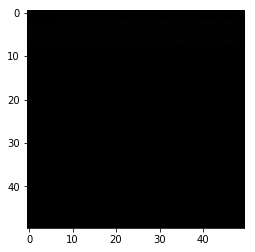

In [75]:
# First,open the desired .tif image and store it in a variable.
tif_image = M3(get_path('M3_4030seg_L2_aristcrater.tif'))

# Getting warnings for passing in the M3 object directly.
mustard_result = new.mustard(tif_image)

# Produces black square when result is fed into imshow.
imshow(mustard_result)

# How to Extract Spectra at an Individual Pixel

In [73]:
# First,open the desired .tif image and store it in a variable.
tif_image = M3(get_path('M3_4030seg_L2_aristcrater.tif'))




# How to Extract Spectra in a ROI

# How to Extract Spectra with a Function Applied

# How to Perform Continuum Removal

# How to Apply the Horgan Algorithms

# Bonus: How to Display Two or More Single-Band Images at Once

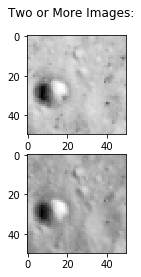

In [74]:
# First,open the desired .tif image and store it in a variable.
tif_image = M3(get_path('M3_4030seg_L2_aristcrater.tif'))

# Initialize the array to hold all of the band images.
images = []

# Specify how many bands you want to display.
number_of_images = 2

# Create the figure object that will hold the band images within subplots.
figure1, axes1 = subplots(number_of_images)

# Choose a title, if you want.
figure1.suptitle('Two or More Images:')

# Add the band images to the image array:

# axes[n] selects the row in which the image will be displayed (n).

# tif_image[i] selects band via index (i) from the tif image. 
# Note: 'tif_image.loc[label]' can also be used in order to select the band by label.

# The cmap parameter is used to select the color mapping.
# Color mapping options include:'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#                               'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#                               'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'

images.append(axes1[0].imshow(tif_image[0], cmap='Greys'))


images.append(axes1[1].imshow(tif_image[50], cmap='Greys'))

# By default, subplots have x and y tick labels, so this loop will remove them, if needed.

# for axi in axes1:
#     axi.set_xticks([])
#     axi.set_yticks([])


# This could be useful for future applications, where someone may want to compare two or more specific bands.
# Running two imshows in a row would normally overwrite the previous imshow, so a matplotlib figure object
# can be used to remedy this.
# However, refactoring to make the code easier to manipulate and read would be ideal.
# At the moment, I'm not sure how to resize the image, or add a colorbar to each of them.